# Success of Movie Prediction

### Deepak Kumar Sharma

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [3]:
data=pd.read_csv("Dataset.csv")
data=data.dropna(axis=0, how='any')

In [4]:
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Data for Analysis 

In [5]:
X = data[data.columns[6:32]]
Y=data.iloc[:,-1]

##### Training and Testing by splitting the Dataset 

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

###### Applying Logistic Regression on the model  

In [7]:
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)
y_pred = LogReg.predict(X_test)

##### Model Evaluation

In [8]:
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

###### Visualizing the result 

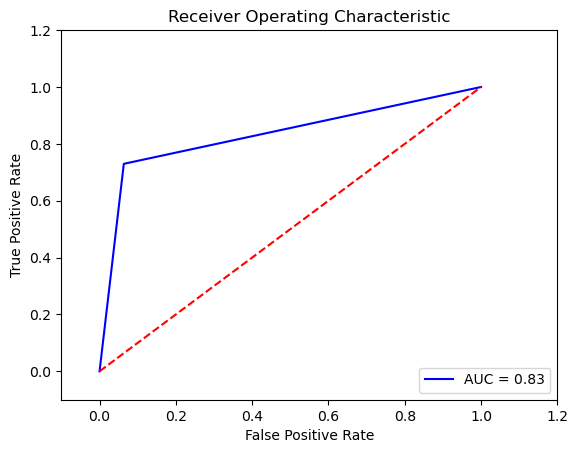

In [9]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### Printing the Result 

In [10]:
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[162  11]
 [ 10  27]]

Accuracy is :
0.9

Precision is :
0.7105263157894737

Recall is: 
0.7297297297297297
